**Átlagos megállapítások**

Meghatározza a webshopban elérhető termékek _legalacsonyabb,_ _legmagasabb_ és _átlagos_ árát.

In [3]:
SELECT
    MIN(LISTAAR) AS 'Minimum ár',
    MAX(LISTAAR) As 'Maximum ár',
    AVG(LISTAAR) AS 'Átlagos ár'
FROM termek
WHERE LISTAAR >0;

(1 row affected)

Total execution time: 00:00:00.012

Minimum ár,Maximum ár,Átlagos ár
3,46000,"787,7109090909091"


**Termékek egyediségének és árkategóriáinak vizsgálata**

Statisztikai elemzés, amely megmutatja: h<span style="color: var(--vscode-foreground);">ány termék van az adatbázisba, h</span><span style="color: var(--vscode-foreground);">ány <i>egyedi termékkód</i> van, h</span><span style="color: var(--vscode-foreground);">ány <i>különböző árkategória</i> létezik, h</span><span style="color: var(--vscode-foreground);">ány <i>termékkategória </i>van jelen.</span>

In [9]:
SELECT 
    COUNT(*) AS 'Összes rekord',
    COUNT(DISTINCT TERMEKKOD) AS 'Egyedi_termékkódok száma',
    COUNT(DISTINCT LISTAAR) AS 'Különböző listaárak száma',
    COUNT(DISTINCT KAT_ID) AS 'Különböző kategóriák száma'
FROM termek

(1 row affected)

Total execution time: 00:00:00.017

osszes_rekord,egyedi_termekkodok,kulonbozo_listaarak_szama,kulonbozo_kategoriak_szama
551,551,220,143


**Kategória szerinti csoportosítás**

Kiszámítja, hogy melyik kategóriában van a legtöbb termék.

A diagram az első 10 legtöbb darab számmal rendelkező termékkódot mutatja meg.

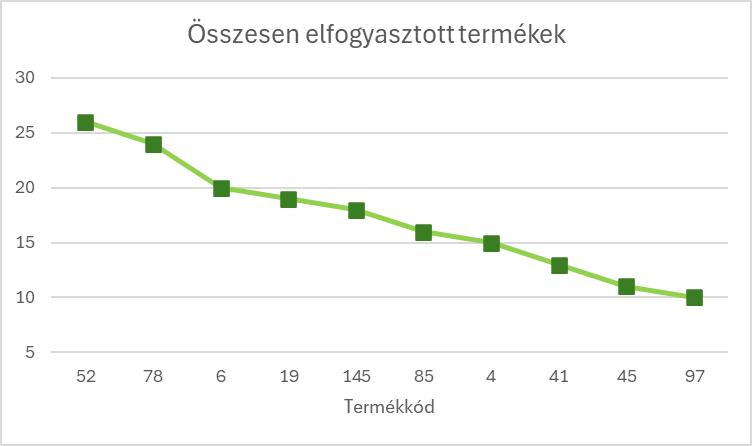

In [5]:
SELECT KAT_ID AS 'Kategória azonosító', 
    COUNT(*) AS 'Darab'
FROm termek
GROUP BY KAT_ID
ORDER BY 2 DESC

(143 rows affected)

Total execution time: 00:00:00.007

KAT_ID,Darab
52,26
78,24
6,20
19,19
145,18
85,16
4,15
41,13
45,11
97,10


**Havi bontásban a termékek vásárlásának száma**

Megmutatja, hogy melyik _hónapban hány új terméket_ rögzítettek az adatbázisba.

A diagram a havi bontást ábrázolja, hiszen minden adatot 2016-ban rögzítettek.

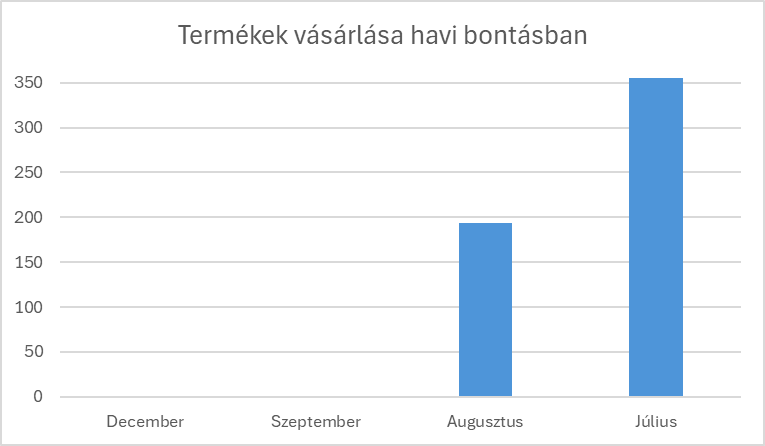

In [10]:
SELECT 
    YEAR(FELVITEL) AS 'Év',
    MONTH(FELVITEL) AS 'Hónap',
    COUNT(*) AS 'Darabszám'
FROM termek
WHERE FELVITEL IS NOT NULL
GROUP BY YEAR(FELVITEL), MONTH(FELVITEL)
ORDER BY 1, 2 DESC;

(4 rows affected)

Total execution time: 00:00:00.006

Év,HÓnap,termek_db
2016,12,1
2016,9,1
2016,8,194
2016,7,355


**Termékkód és készlet kapcsolat**

Azon termékek kilistázása, amelyeket _júliusban_ vettek fel az adatbázisba, és amelyekből még van készleten.

In [14]:
SELECT TERMEKKOD AS 'Termékkód', 
    SUM(KESZLET) AS 'Készleten'
FROM termek
WHERE MONTH(FELVITEL) = 7
GROUP BY TERMEKKOD
HAVING SUM(KESZLET) > 0
ORDER BY 2 DESC

(353 rows affected)

Total execution time: 00:00:00.041

termekkod,(No column name)
03050457T,50000
03050079T,40000
03050080T,26000
02080435T,10000
02030044T,10000
02040002T,10000
04030236T,10000
02040293T,9000
03050458T,8000
04040090T,7700
